[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bulenok_2023_MasterThesis/performance_comparison_Srivastava_Setup.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Bulenok_2023_MasterThesis/performance_comparison_Srivastava_Setup.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bulenok_2023_MasterThesis/performance_comparison_Srivastava_Setup.ipynb)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import os
os.environ['NUMBA_NUM_THREADS'] = '10'

from datetime import datetime
import numba  # pylint: disable=unused-import

from PySDM.backends import GPU, CPU
from PySDM.physics import si

from PySDM_examples.Bulenok_2023_MasterThesis.utils import go_benchmark, process_results, plot_processed_results, write_to_file
from PySDM_examples.Bulenok_2023_MasterThesis.setups import setup_coalescence_only_sim, setup_breakup_only_sim, setup_coalescence_breakup_sim

/Users/sanketbhiogade/PySDM/PySDM/backends/impl_numba/conf.py:18: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


In [3]:
TIMESTAMP = str(datetime.now().strftime("%Y-%d-%m_%Hh-%Mm-%Ss"))

In [4]:
SIM_RUN_FILENAME="env_name_" + TIMESTAMP

In [5]:
assert not os.path.isfile(SIM_RUN_FILENAME)

!echo NUMBA_DEFAULT_NUM_THREADS: $numba.config.NUMBA_DEFAULT_NUM_THREADS >> $SIM_RUN_FILENAME
!echo NUMBA_NUM_THREADS: $numba.config.NUMBA_NUM_THREADS >> $SIM_RUN_FILENAME
!lscpu >> $SIM_RUN_FILENAME
!nvidia-smi >> $SIM_RUN_FILENAME
!nvidia-smi -L >> $SIM_RUN_FILENAME

!cat /proc/cpuinfo >> $SIM_RUN_FILENAME

zsh:1: command not found: lscpu
zsh:1: command not found: nvidia-smi
zsh:1: command not found: nvidia-smi
cat: /proc/cpuinfo: No such file or directory


In [6]:
CI = 'CI' in os.environ

exponents = [3, 5, 8, 10, 12, 14, 16, 18, 20, 22, 24] if not CI else [3, 5]
n_sds = [2 ** i for i in exponents]

numba_n_threads = [1, 2, 4, 5, 6, 8, 10] if not CI else [1, 2]

n_realisations = 3 if not CI else 2
seeds = list(range(n_realisations))

n_steps_short = 100 if not CI else 3
n_steps_full = 2048 if not CI else 3

# Benchmark regular setup (without scaling)

### Coalescence-only

In [7]:
res_coalescence_only = go_benchmark(
    setup_coalescence_only_sim, n_sds, n_steps_short, seeds, numba_n_threads=numba_n_threads, double_precision=True, 
    sim_run_filename=SIM_RUN_FILENAME + '-coalescence',
    backends=[CPU, GPU]
)


before


Numba_1 8

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0

products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [9536617.]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [4270636.]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [112154.]
total_volume [1000000.]
super_particle_count [8.]


Numba_1 32

== Settings ==
n_sd 32
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000

/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


super_particle_count [8.]

start simulation

products after simulation
total_number [668408.]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [179520.]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [114785.]
total_volume [1000000.]
super_particle_count [8.]


ThrustRTC 32

== Settings ==
n_sd 32
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [32.]

start simulation

products after simulation
total_number [58512.]
total_volume [1000000.]
super_particle_count [32.]

== Settings ==
n_sd 32
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [32.]

start simulation

products after simulation
total_number [227855.]
total_volume [1000000.]
super_particle_count [32.]

== Settings ==
n_sd 32
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [32.]

start simulation

products after simulation
total_number [52324.]
total_volume [1000000.]
super_particle_count [32.]


ThrustRTC 256

== Settings ==
n_sd 256
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [256.]

start simulation

products after simulation
total_number [64351.]
total_volume [1000000.]
super_particle_count [256.]

== Settings ==
n_sd 256
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [256.]

start simulation

products after simulation
total_number [92728.]
total_volume [1000000.]
super_particle_count [255.]

== Settings ==
n_sd 256
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [256.]

start simulation

products after simulation
total_number [48252.]
total_volume [1000000.]
super_particle_count [256.]


ThrustRTC 1024

== Settings ==
n_sd 1024
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [1024.]

start simulation

products after simulation
total_number [72657.]
total_volume [1000000.]
super_particle_count [1024.]

== Settings ==
n_sd 1024
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [1024.]

start simulation

products after simulation
total_number [147543.]
total_volume [1000000.]
super_particle_count [1022.]

== Settings ==
n_sd 1024
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [1024.]

start simulation

products after simulation
total_number [49496.]
total_volume [1000000.]
super_particle_count [1019.]


ThrustRTC 4096

== Settings ==
n_sd 4096
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [4096.]

start simulation

products after simulation
total_number [46085.]
total_volume [1000000.]
super_particle_count [4037.]

== Settings ==
n_sd 4096
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [4096.]

start simulation

products after simulation
total_number [45515.]
total_volume [1000000.]
super_particle_count [4035.]

== Settings ==
n_sd 4096
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.e+12]
total_volume [1000000.]
super_particle_count [4096.]

start simulation

products after simulation
total_number [45939.]
total_volume [1000000.]
super_particle_count [4056.]


ThrustRTC 16384

== Settings ==
n_sd 16384
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590442]
super_particle_count [16384.]

start simulation

products after simulation
total_number [73306.]
total_volume [999999.99590401]
super_particle_count [15287.]

== Settings ==
n_sd 16384
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590442]
super_particle_count [16384.]

start simulation

products after simulation
total_number [69125.]
total_volume [999999.995904]
super_particle_count [15340.]

== Settings ==
n_sd 16384
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590442]
super_particle_count [16384.]

start simulation

products after simulation
total_number [55387.]
total_volume [999999.995904]
super_particle_count [15275.]


ThrustRTC 65536

== Settings ==
n_sd 65536
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590339]
super_particle_count [65536.]

start simulation

products after simulation
total_number [53819.]
total_volume [999999.995904]
super_particle_count [40084.]

== Settings ==
n_sd 65536
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590339]
super_particle_count [65536.]

start simulation

products after simulation
total_number [54726.]
total_volume [999999.99590399]
super_particle_count [39864.]

== Settings ==
n_sd 65536
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999996e+11]
total_volume [999999.99590339]
super_particle_count [65536.]

start simulation

products after simulation
total_number [57042.]
total_volume [999999.995904]
super_particle_count [40069.]


ThrustRTC 262144

== Settings ==
n_sd 262144
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.9999993e+11]
total_volume [999999.930365]
super_particle_count [262144.]

start simulation

products after simulation
total_number [46357.]
total_volume [999999.930368]
super_particle_count [45323.]

== Settings ==
n_sd 262144
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.9999993e+11]
total_volume [999999.930365]
super_particle_count [262144.]

start simulation

products after simulation
total_number [46298.]
total_volume [999999.930368]
super_particle_count [45068.]

== Settings ==
n_sd 262144
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.9999993e+11]
total_volume [999999.930365]
super_particle_count [262144.]

start simulation

products after simulation
total_number [46541.]
total_volume [999999.930368]
super_particle_count [45208.]


ThrustRTC 1048576

== Settings ==
n_sd 1048576
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999668e+11]
total_volume [999999.66821451]
super_particle_count [1048576.]

start simulation

products after simulation
total_number [43535.]
total_volume [999999.668224]
super_particle_count [43529.]

== Settings ==
n_sd 1048576
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999668e+11]
total_volume [999999.66821451]
super_particle_count [1048576.]

start simulation

products after simulation
total_number [43698.]
total_volume [999999.668224]
super_particle_count [43694.]

== Settings ==
n_sd 1048576
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [9.99999668e+11]
total_volume [999999.66821451]
super_particle_count [1048576.]

start simulation

products after simulation
total_number [43556.]
total_volume [999999.668224]
super_particle_count [43552.]


ThrustRTC 4194304

== Settings ==
n_sd 4194304
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.00000177e+12]
total_volume [1000001.76526462]
super_particle_count [4194304.]

start simulation

products after simulation
total_number [44800.]
total_volume [1000001.76537601]
super_particle_count [44797.]

== Settings ==
n_sd 4194304
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.00000177e+12]
total_volume [1000001.76526462]
super_particle_count [4194304.]

start simulation

products after simulation
total_number [44717.]
total_volume [1000001.765376]
super_particle_count [44707.]

== Settings ==
n_sd 4194304
total_number 1000000000000.0
dv 1.0


products before simulation


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")


total_number [1.00000177e+12]
total_volume [1000001.76526462]
super_particle_count [4194304.]

start simulation

products after simulation
total_number [44395.]
total_volume [1000001.765376]
super_particle_count [44384.]


ThrustRTC 16777216

== Settings ==
n_sd 16777216
total_number 1000000000000.0
dv 1.0


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")



products before simulation
total_number [1.00000596e+12]
total_volume [1000005.95939884]
super_particle_count [16777216.]

start simulation

products after simulation
total_number [43183.]
total_volume [1000005.95968]
super_particle_count [43089.]

== Settings ==
n_sd 16777216
total_number 1000000000000.0
dv 1.0


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")



products before simulation
total_number [1.00000596e+12]
total_volume [1000005.95939884]
super_particle_count [16777216.]

start simulation

products after simulation
total_number [43038.]
total_volume [1000005.95967999]
super_particle_count [42959.]

== Settings ==
n_sd 16777216
total_number 1000000000000.0
dv 1.0


/Users/sanketbhiogade/PySDM/PySDM/backends/thrust_rtc.py:74: UserWarning: CUDA is not available, using FakeThrustRTC!
  warnings.warn("CUDA is not available, using FakeThrustRTC!")



products before simulation
total_number [1.00000596e+12]
total_volume [1000005.95939884]
super_particle_count [16777216.]

start simulation

products after simulation
total_number [42899.]
total_volume [1000005.95967999]
super_particle_count [42817.]


In [8]:
coalescence_only_processed = process_results(res_coalescence_only)

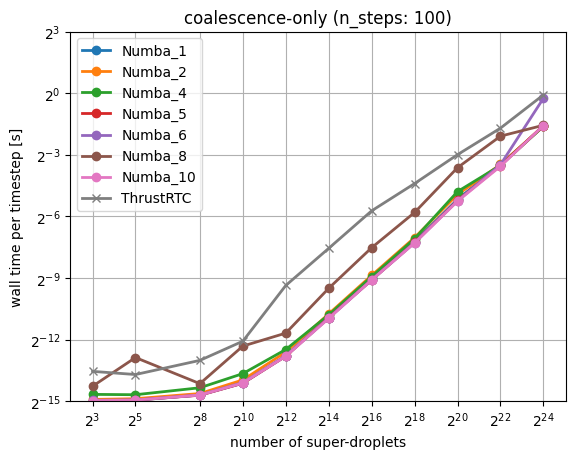

In [9]:
plot_processed_results(coalescence_only_processed, plot_title=f'coalescence-only (n_steps: {n_steps_short})')

In [10]:
filename=f"{SIM_RUN_FILENAME}-results-coalescence-double-n_steps{n_steps_short}.txt"
write_to_file(filename=filename, d=coalescence_only_processed)

### Breakup-only

In [ ]:
res_breakup_only = go_benchmark(
    setup_breakup_only_sim, n_sds, n_steps_short, seeds, numba_n_threads=numba_n_threads, double_precision=True,
    sim_run_filename=SIM_RUN_FILENAME + '-breakup',
    backends=[CPU, GPU]
)


before


Numba_1 8

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

== Settings ==
n_sd 8
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]

start simulation

products after simulation
total_number [1.e+12]
total_volume [1000000.]
super_particle_count [8.]


Numba_1 32

== Settings ==
n_sd 32
total_number 1000000000000.0
dv 1.0


products before simulation
total_number [1.e+12]
total_volume [1000000.]
s

In [ ]:
breakup_only_processed = process_results(res_breakup_only)

In [ ]:
plot_processed_results(breakup_only_processed, plot_title=f'breakup-only  (n_steps: {n_steps_short})')

In [ ]:
filename=f"{SIM_RUN_FILENAME}-results-breakup-double-n_steps{n_steps_short}.txt"
write_to_file(filename=filename, d=breakup_only_processed)

### Coalescence and Breakup

In [ ]:
res_coal_breakup = go_benchmark(
    setup_coalescence_breakup_sim, n_sds, n_steps_full, seeds, numba_n_threads=numba_n_threads, double_precision=True, 
    sim_run_filename=SIM_RUN_FILENAME + '-coal-break',
    backends=[CPU, GPU]
)

In [ ]:
coal_breakup_processed = process_results(res_coal_breakup)

In [ ]:
plot_processed_results(coal_breakup_processed, plot_title=f'coalescence+breakup (n_steps: {n_steps_full})')

In [ ]:
filename=f"{SIM_RUN_FILENAME}-results-coal_with_breakup-double-n_steps{n_steps_full}.txt"
write_to_file(filename=filename, d=coal_breakup_processed)

# Benchmark setup with scaling

In [ ]:
def total_number_from_n_sd(n_sd):
    return n_sd * 1e8

def dv_from_n_sd(n_sd):
    return n_sd * (0.125 * si.m**3)

### Coalescence-only

In [ ]:
res_coalescence_only_scaled = go_benchmark(
    setup_coalescence_only_sim, n_sds, n_steps_short, seeds, numba_n_threads=numba_n_threads, double_precision=True, 
    sim_run_filename=SIM_RUN_FILENAME + '-coalescence-scaled',
    total_number=total_number_from_n_sd,
    dv=dv_from_n_sd,
    backends=[CPU, GPU]
)

In [ ]:
coalescence_only_processed_scaled = process_results(res_coalescence_only_scaled)

In [ ]:
plot_processed_results(coalescence_only_processed_scaled, plot_title=f'coalescence-only with scaling (n_steps: {n_steps_short})')

In [ ]:
filename=f"{SIM_RUN_FILENAME}-results-scaled-coalescence-double-n_steps{n_steps_short}.txt"
write_to_file(filename=filename, d=coalescence_only_processed_scaled)

### Breakup-only

In [ ]:
res_breakup_only_scaled = go_benchmark(
    setup_breakup_only_sim, n_sds, n_steps_short, seeds, numba_n_threads=numba_n_threads, double_precision=True,
    sim_run_filename=SIM_RUN_FILENAME + '-breakup-scaled',
    total_number=total_number_from_n_sd,
    dv=dv_from_n_sd,
    backends=[CPU, GPU]
)

In [ ]:
breakup_only_processed_scaled = process_results(res_breakup_only_scaled)

In [ ]:
plot_processed_results(breakup_only_processed_scaled, plot_title=f'breakup-only with scaling (n_steps: {n_steps_short})')

In [ ]:
filename=f"{SIM_RUN_FILENAME}-results-scaled-breakup-double-n_steps{n_steps_short}.txt"
write_to_file(filename=filename, d=breakup_only_processed_scaled)

### Coalescence and Breakup

In [ ]:
res_coal_breakup_scaled = go_benchmark(
    setup_coalescence_breakup_sim, n_sds, n_steps_full, seeds, numba_n_threads=numba_n_threads, double_precision=True, 
    sim_run_filename=SIM_RUN_FILENAME + '-coal-break-scaled',
    total_number=total_number_from_n_sd,
    dv=dv_from_n_sd,
    backends=[CPU, GPU]
)

In [ ]:
coal_breakup_processed_scaled = process_results(res_coal_breakup_scaled)

In [ ]:
plot_processed_results(coal_breakup_processed_scaled, plot_title=f'coalescence+breakup with scaling (n_steps: {n_steps_full})')

In [ ]:
filename=f"{SIM_RUN_FILENAME}-results-scaled-coal_with_breakup-double-n_steps{n_steps_full}.txt"
write_to_file(filename=filename, d=coal_breakup_processed_scaled)